# Jupyter Notebook Title

## Contents of Notebook
Description of contents:

covers Vanderplas examples

Author: Don Cameron

Contact: donrcameron@gmail.com, +61 (0) 413208746

### Notebook magic commands

In [1]:
%matplotlib inline


### Notebook imports

In [7]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import matplotlib.pyplot as plt

from urllib.request import urlretrieve


### Notebook version status

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:42) [MSC v.1900 64 bit (AMD64)]
python environment : root36
pandas version : 0.21.0
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\BikeTripAnalysisNotebookProject\develop
Notebook name: 2018-2-11-dc-BikeTripAnalysisNotebook
Notebook run at: 2018-02-11 16:20:38.893384 local time
Notebook run at: 2018-02-11 06:20:38.894416 UTC
Notebook run on: Windows-10-10.0.16299-SP0


## Get the identification of git repository holding notebook

In [73]:
import githubid.githubid as gid

#  GIT_LOCATION is the path of the git executable
GIT_LOCATION = \
'C:\\Users\\donrc\\AppData\\Local\\GitHub\\PortableGit_f02737a78695063deace08e96d5042710d3e32db\\cmd\\git.exe'

print(gid.get_repo_version(git_location=GIT_LOCATION))

('refs/heads/master', '14ee2d19f13bf25d0e092f5c2dd1beda3ca6a32f', '', '14ee2d1', 'C:/Users/donrc/Documents/JupyterNotebooks/BikeTripAnalysisNotebookProject', 'https://github.com/coolum001/BikeTripAnalysisNotebookProject.git')


## Load the Data

Define a function to load a csv dataset.  If the file specified exists, use it, otherwise download it
from the nominated URL.

We expect a column labelled 'Date', that we use as a index.

We rename the columns to use shorter names

In [46]:
from urllib.request import urlretrieve
import pandas as pd

def load_csv_datetime_data(url=None, file_path=None):
    '''
    Load a csv dataset from a file location, of failing that, a url.
    
    This function assumes that the file/url nominated holds csv data,
    with one column holding datetime values, labelled 'Date', and 
    the first data column hold west bound counts
    the second data column hold east bound counts
    
    Input:
    url: string: the url to retrieve data from for the nominate file is missing
    file_path: string: the path holding/to hold the csv data set
    
    Returns:
    A pandas dataframe, with columns "West", "East", and a datetime index
    
    Exceptions:
    Throws assertion failures if the url and file_path parameters are not supplied
    
    '''
    assert not (file_path==None), 'No save file path specified'
    assert not (url==None),  'No download url specified'
    
    try:
        b_file = open(file_path)
    except:
        # file not there yet
        # request url 
        urlretrieve(url, file_path)
    #end try
    
    # read the csv file.  colm named 'Date' can be used as an index
    bikedf = pd.read_csv(file_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
    # retitle colms with shorter names
    bikedf.columns = ['West', 'East']
    
    return bikedf
#end load_bike_data
    
    

### Load the bike data

In [47]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
csv_file = '../data/fremont.csv'

bikedf = load_csv_datetime_data(url=url, file_path = csv_file)

### Explore the data

In [37]:
bikedf.head()

,West,"East"""
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [38]:
bikedf.tail()

,West,"East"""
Date,,
2017-12-31 19:00:00,9.0,12.0
2017-12-31 20:00:00,6.0,8.0
2017-12-31 21:00:00,3.0,10.0
2017-12-31 22:00:00,7.0,6.0
2017-12-31 23:00:00,7.0,9.0


Show minute by minute counts

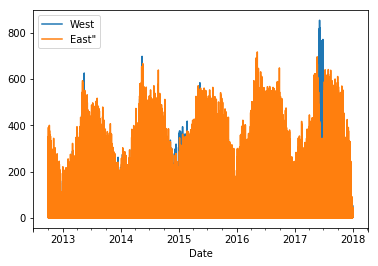

In [39]:
bikedf.plot()

Check the datatype of the index

In [31]:
type(bikedf.index)

pandas.core.indexes.datetimes.DatetimeIndex

Resample data by summing over each week  (by default pandas has weeks starting Sunday)

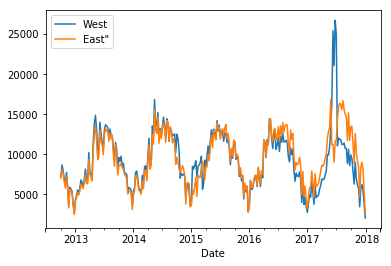

In [40]:
bikedf.resample(rule='W').sum().plot()

Resample to sum over each month

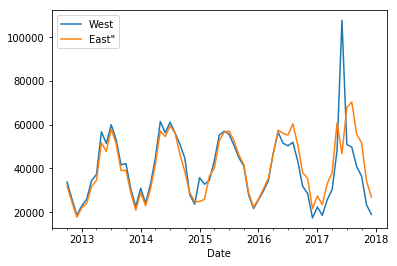

In [41]:
bikedf.resample(rule='M').sum().plot()

Plot yearly totals

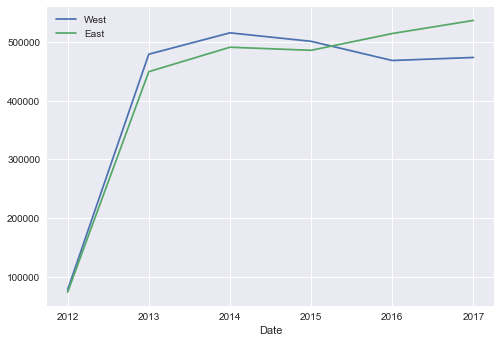

In [51]:
bikedf.resample(rule='Y').sum().plot()

Switch to seaborn style graphs

In [48]:
plt.style.use('seaborn')

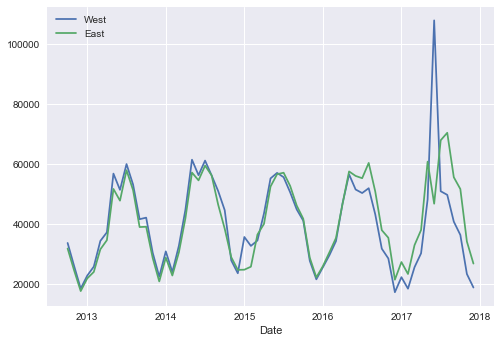

In [49]:
bikedf.resample(rule='M').sum().plot()

Sum data by day, and sum by a rolling 365 day window.  Create a new data column showing the total of East and West counts

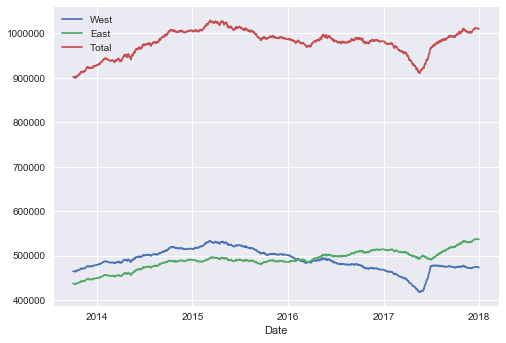

In [54]:
bikedf['Total'] = bikedf['East']+bikedf['West']

bikedf.resample(rule='D').sum().rolling(365).sum().plot()

Group the data by hour of day, and plot the mean count in each hour

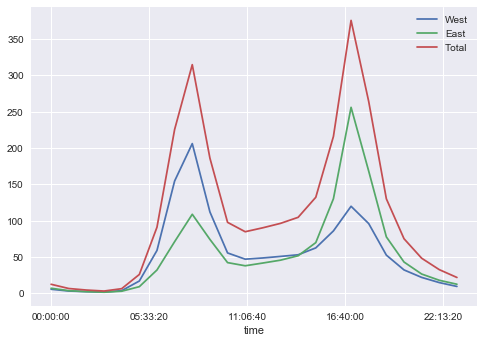

In [56]:
bikedf.groupby(bikedf.index.time).mean().plot()

Show the maximum count for each hour of the day

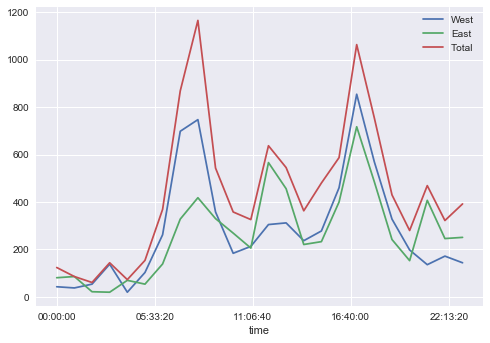

In [65]:
bikedf.groupby(bikedf.index.time).max().plot()

Show the mean hourly count, and maximum hourly count on the same figure

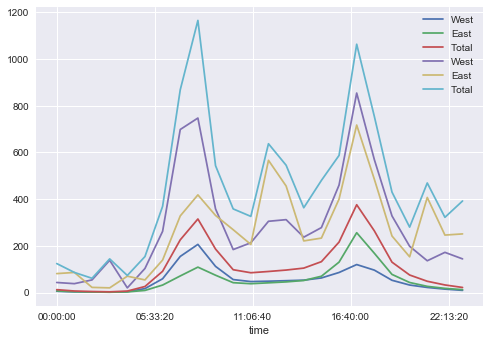

In [63]:
ax = bikedf.groupby(bikedf.index.time).mean().plot()
bikedf.groupby(bikedf.index.time).max().plot(ax=ax)

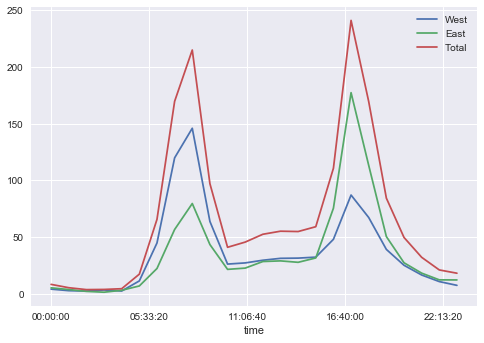

In [66]:
bikedf.groupby(bikedf.index.time).std().plot()

Create columns for each day in period; index now rums over hour of day;  data values are the total bike count (E & W)


In [70]:
pivoted = bikedf.pivot_table('Total', index=bikedf.index.time, columns=bikedf.index.date)

pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


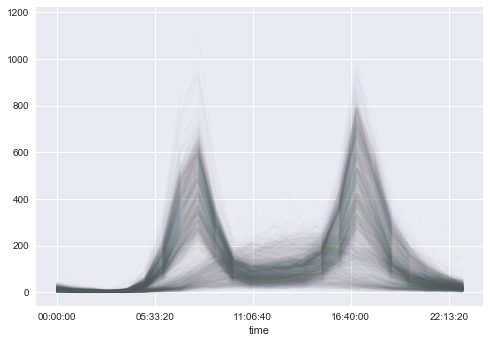

In [72]:
pivoted.plot(legend=False, alpha=0.01)

### Customizations for notebook

In [9]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [5]:
from IPython.display import FileLink
FileLink('../develop/a.ipynb')

C:\Users\donrc\Documents\JupyterNotebooks\TemplateNotebookProject\develop\a.ipynb

### Display associated webpages (eg source of data)

In [6]:
from IPython.display import IFrame
IFrame("http://www.net-analysis.com", width = 800, height = 200)

### Save figures to figures directory

../figures/Test20170218-193200.jpg saved.


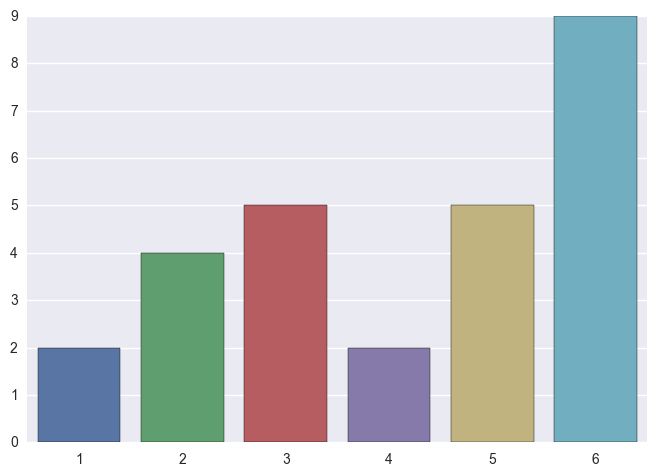

In [16]:
def save_figure(figure_title='TemplateNotebookFigure', figure_prefix='../figures/'):
    """
     save_figure:  same the current matplotlib.pyplot figure as a jpg file

     a file is generated from the supplied title, and the date and time

     Inputs:
     figure_title: string, incorporated into file name
     figure_prefix: string giving relative (or absolute) path the save location
     Returns:
     True is save OK
     False otherwise

     Outputs:
     prints error messages on exceptions

    """

    try:
        fname     = figure_prefix+figure_title+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.jpg'
        plt.savefig(fname)
        print(fname+' saved.')
    except IOError as err:
        print('Unable to save figure - IO Error!')
        print("IO error: {0}".format(err))
    except OSError as err:
        print('Unable to save figure - OS Error!')
        print("OS error: {0}".format(err))
    except:
        print('Unable to save figure - Unexpected Error!')
        print("Unexpected error:", sys.exc_info()[0])
        raise
    #end try
#end save_figure

x         =[1,2,3,4,5,6]
y         =[2,4,5,2,5,9]
plot2     = sns.barplot(x=x, y=y)

save_figure(figure_title='Test', figure_prefix=FIGURE_PREFIX)

plt.show()

### Display images

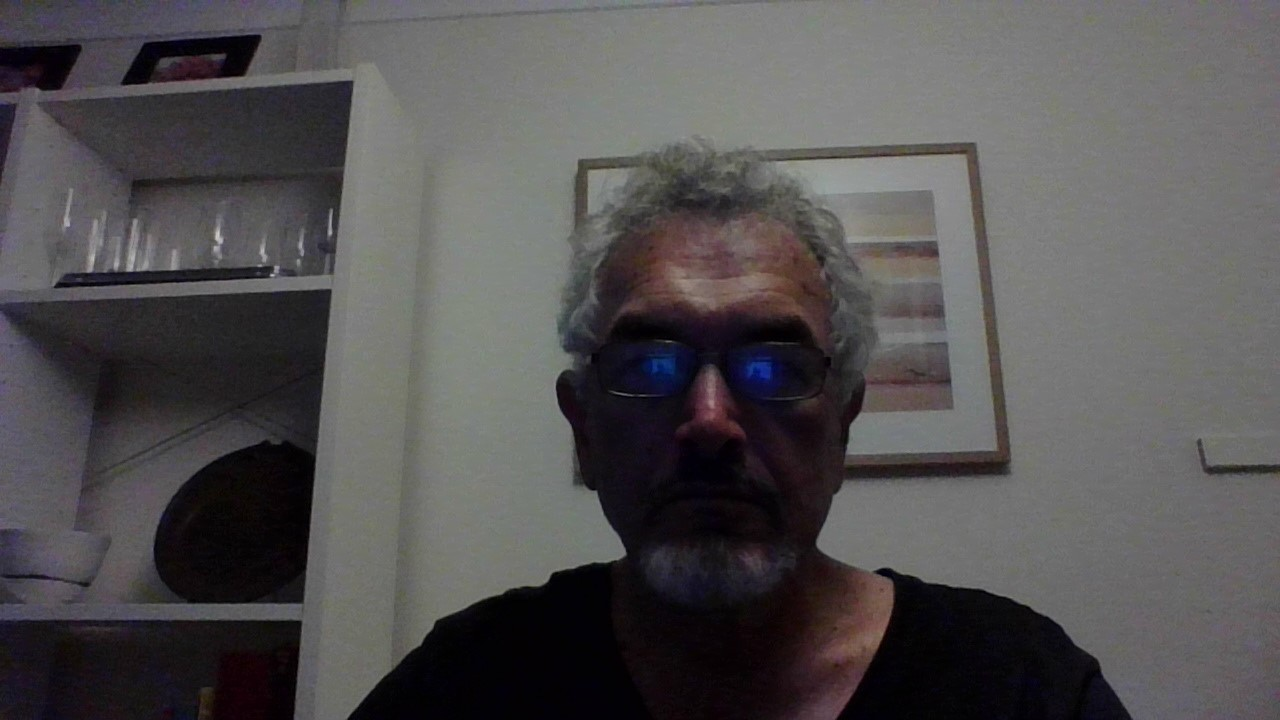

In [8]:
from IPython.display import Image
Image(filename='../figures/apc.jpg', height = 100, width = 200)

## Conclusions / Summary